In [0]:
#para cargar archivos .zip
from google.colab import files
uploaded = files.upload()

Saving logo.zip to logo.zip


In [0]:
#para descomprimir el archivo
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['logo.zip']),'r')
data.extractall()

In [0]:
#librerias
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
#carpeta de positivos
posupds_folder_path ="/content/posupds"
posupds=[]
img_size=150

In [0]:
#devuelve la carpeta especificada contiene un nombre de carpeta
for img in os.listdir(posupds_folder_path):
  img = cv2.imread(os.path.join(posupds_folder_path,img))
  #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img,(img_size,img_size))
  posupds.append(img_resize)

In [0]:
posupds = np.array(posupds)
print(posupds.shape)

(41, 150, 150, 3)


In [0]:
#carpeta de diablada
negupds_folder_path ="/content/negupds"
negupds=[]
img_size=150

for img in os.listdir(negupds_folder_path):
  img = cv2.imread(os.path.join(negupds_folder_path,img))
  #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img,(img_size,img_size))
  negupds.append(img_resize)

In [0]:
negupds = np.array(negupds)
print(negupds.shape)

(126, 150, 150, 3)


In [0]:
#concatenar 
#total de las imagens
images = np.concatenate([posupds,negupds])
print(len(images))

167


In [0]:
#converit en arreglo
Images = np.array(images)
print(Images.shape)

(167, 150, 150, 3)


In [0]:
#relacionar un numero con imagen caporales con el numero 0.2
etiquetas_posupds = np.repeat(0,41)
print(len(etiquetas_posupds))
print (etiquetas_posupds)

41
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [0]:
#relacionar un numero con imagen tinkuy con el numero 1
etiquetas_negupds = np.repeat(1,126)
print(len(etiquetas_negupds))
print (etiquetas_negupds)

126
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
#nombre de las posiciones 
class_name=(['Positivo_UPDS','Negativo_UPDS'])



In [0]:
#juntar todas las etiquetas
labels = np.concatenate([etiquetas_posupds,etiquetas_negupds])
print(len(labels))
print(labels)
Labels=np.array(labels)
print(Labels.shape)

167
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(167,)


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.2.0


In [0]:
#entrenamiento
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=60)
trained=model.fit(Images, Labels, epochs=60)



Epoch 1/60
6/6 [==============================] - 0s 55ms/step - loss: 3775.2029 - accuracy: 0.4192
Epoch 2/60
6/6 [==============================] - 0s 55ms/step - loss: 3811.1047 - accuracy: 0.7006
Epoch 3/60
6/6 [==============================] - 0s 56ms/step - loss: 1420.4017 - accuracy: 0.7126
Epoch 4/60
6/6 [==============================] - 0s 57ms/step - loss: 3502.9177 - accuracy: 0.5090
Epoch 5/60
6/6 [==============================] - 0s 56ms/step - loss: 4288.4492 - accuracy: 0.7665
Epoch 6/60
6/6 [==============================] - 0s 55ms/step - loss: 581.9081 - accuracy: 0.7605
Epoch 7/60
6/6 [==============================] - 0s 56ms/step - loss: 489.3081 - accuracy: 0.8323
Epoch 8/60
6/6 [==============================] - 0s 55ms/step - loss: 653.9233 - accuracy: 0.8623
Epoch 9/60
6/6 [==============================] - 0s 55ms/step - loss: 708.5602 - accuracy: 0.7784
Epoch 10/60
6/6 [==============================] - 0s 55ms/step - loss: 1392.6509 - accuracy: 0.8204
Epo

In [0]:
img=Images[4]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


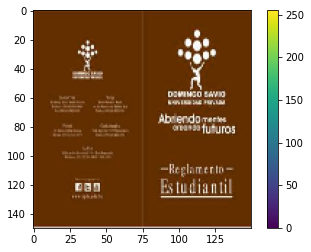

In [0]:
plt.figure()
plt.imshow(Images[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
prediction_single = model.predict(img)
print(prediction_single)
print(np.sum(prediction_single))
print(np.argmax(prediction_single))
print(class_name[np.argmax(prediction_single)])

[[1. 0. 0. 0. 0.]]
1.0
0
Positivo_UPDS


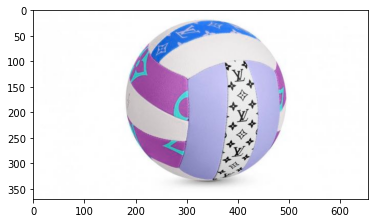

In [0]:
img=cv2.imread("pelota.jpg")

plt.imshow(img)
plt.show()

In [0]:
img2=img
img2=cv2.resize(img2,(img_size,img_size))
print(img2.shape)
img2=(np.expand_dims(img2,0))
print(img2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [0]:
prediction_single = model.predict(img2)
print(prediction_single)
print(np.sum(prediction_single))
print(np.argmax(prediction_single))
print(class_name[np.argmax(prediction_single)])

[[0. 1. 0. 0. 0.]]
1.0
1
Negativo_UPDS
